In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import CSV dataset into pandas dataframe
df = pd.read_csv('data\StudentsPerformance.csv')

In [4]:
# Top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Shape of the dataset
df.shape

(1000, 8)

#### Data checks to perform
* Check missing values
* Check duplicates
* Check datatypes
* Check the number of unique values of each column
* Check statistics of dataset
* Check various categories present in different categorical columns

In [6]:
# Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Check unique values in each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
# Check statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
* From above description of the numerical data, all means are very close to each other - between 66 to 68.05
* All standard deviation are close - between 14.6 and 15.19
* While there is a minimum score = 0 for math, for writing minimum is much higher = 10 and for reading  = 17

In [11]:
# Explore Data
print("Categories in 'gender' variable:    ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ", end = " ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [12]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [13]:
print('We have {} numerical features:{}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features:{}'.format(len(categorical_features), categorical_features))

We have 3 numerical features:['math score', 'reading score', 'writing score']

We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
# Adding columns for "Total_score" and "Average"
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['Average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
math_full = df[df['math score']==100]['Average'].count()

print(f"Number of students with full marks in maths: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")


Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [16]:
reading_less_20 = df[df['reading score']<=20]['Average'].count()
writing_less_20 = df[df['writing score']<=20]['Average'].count()
math_less_20 = df[df['math score']<=20]['Average'].count()

print(f"Number of student with less than 20 marks in maths: {math_less_20}")
print(f"Number of student with less than 20 marks in reading: {reading_less_20}")
print(f"Number of student with less than 20 marks in writing: {writing_less_20}")

Number of student with less than 20 marks in maths: 4
Number of student with less than 20 marks in reading: 1
Number of student with less than 20 marks in writing: 3


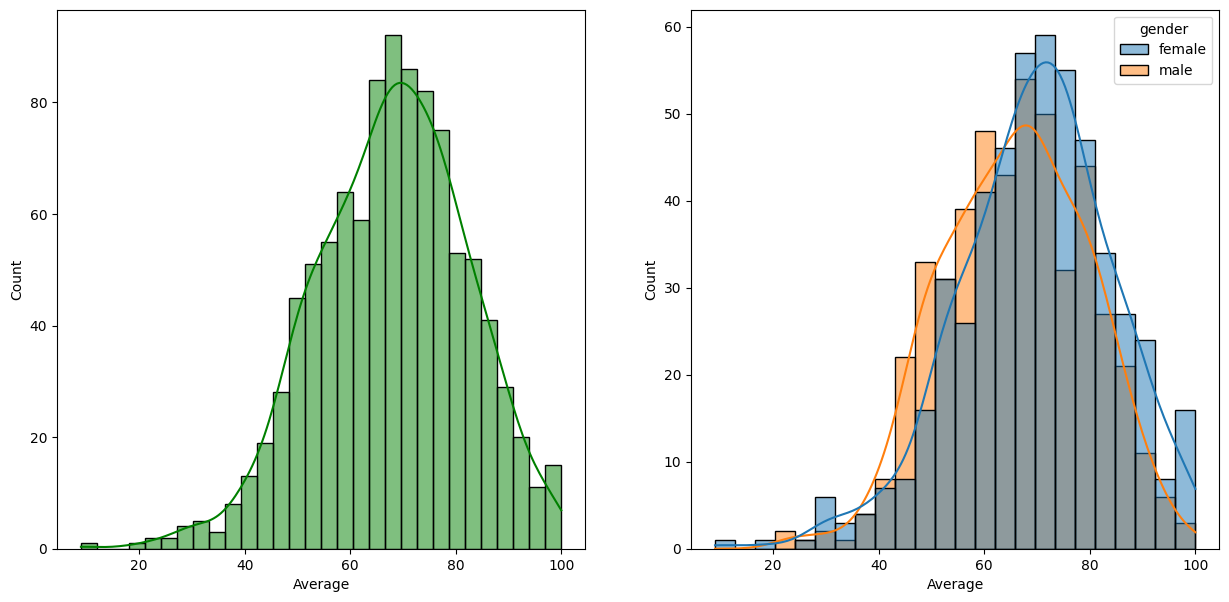

In [17]:
# Visualisations with "Average" column
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = "Average", bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = "Average", kde = True, hue = 'gender')
plt.show()

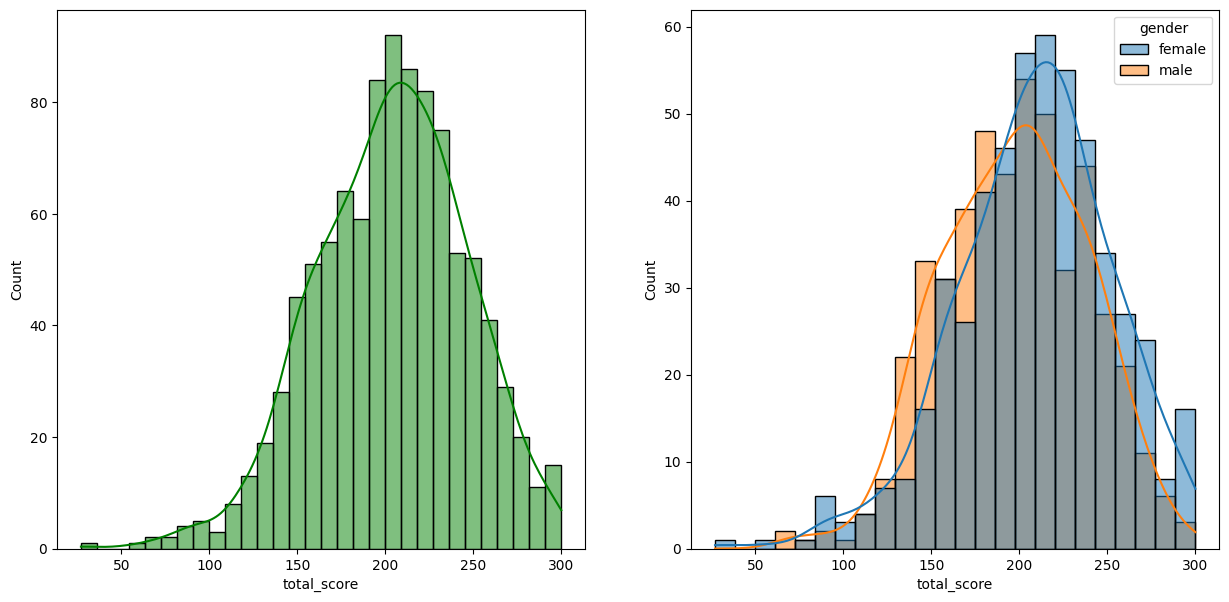

In [18]:
# Visualisations with "Total_score" column
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = "total_score", bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = "total_score", kde = True, hue = 'gender')
plt.show()

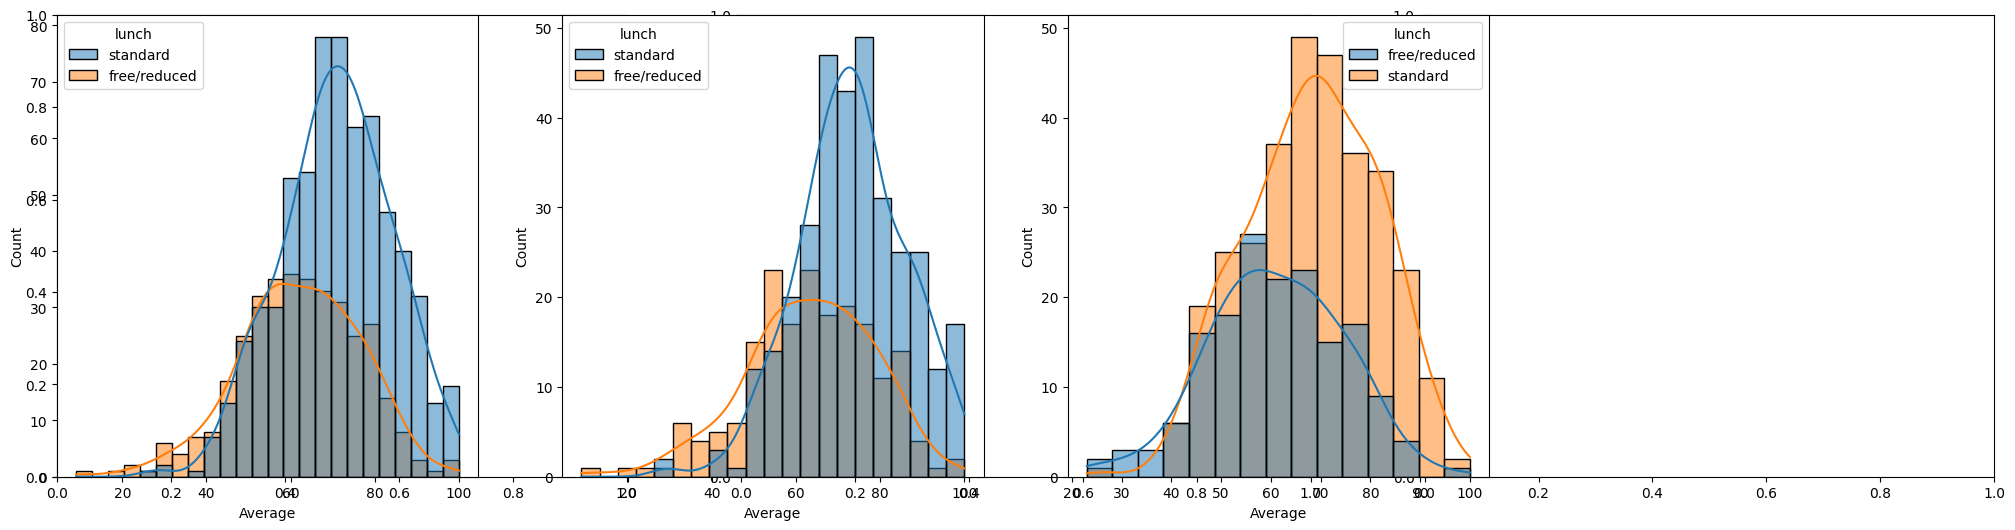

In [21]:
# Visualisation with "lunch"
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

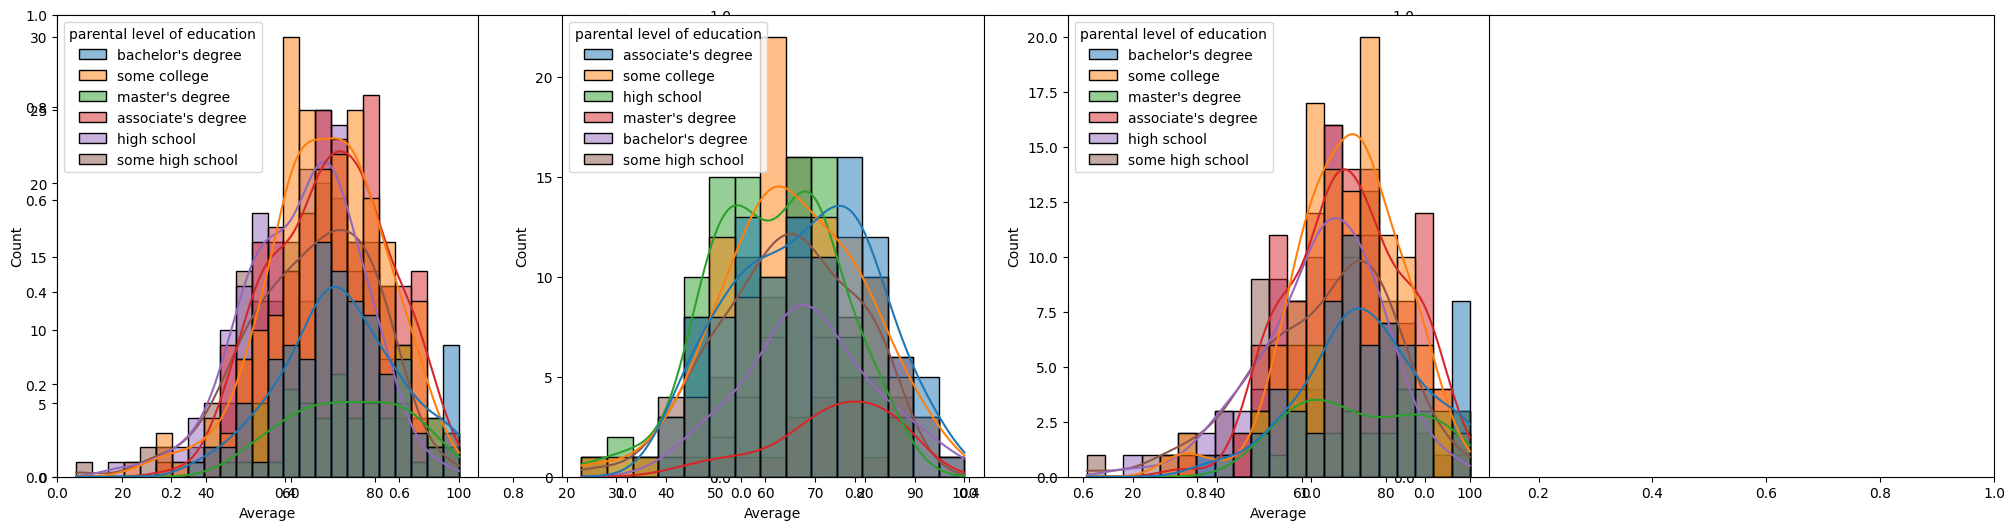

In [22]:
# Visualisation with "parental level of education"
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()

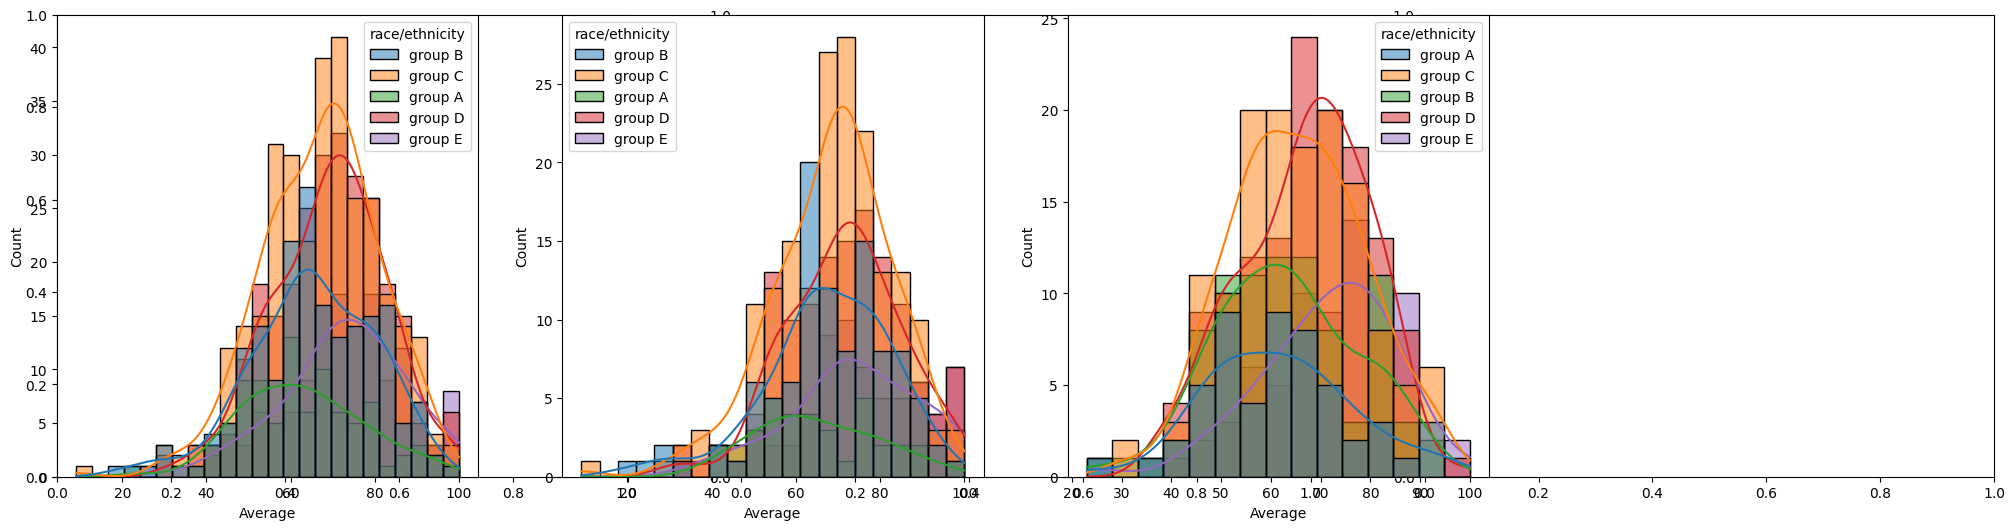

In [23]:
# Visualisation with "race_ethnicity"
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

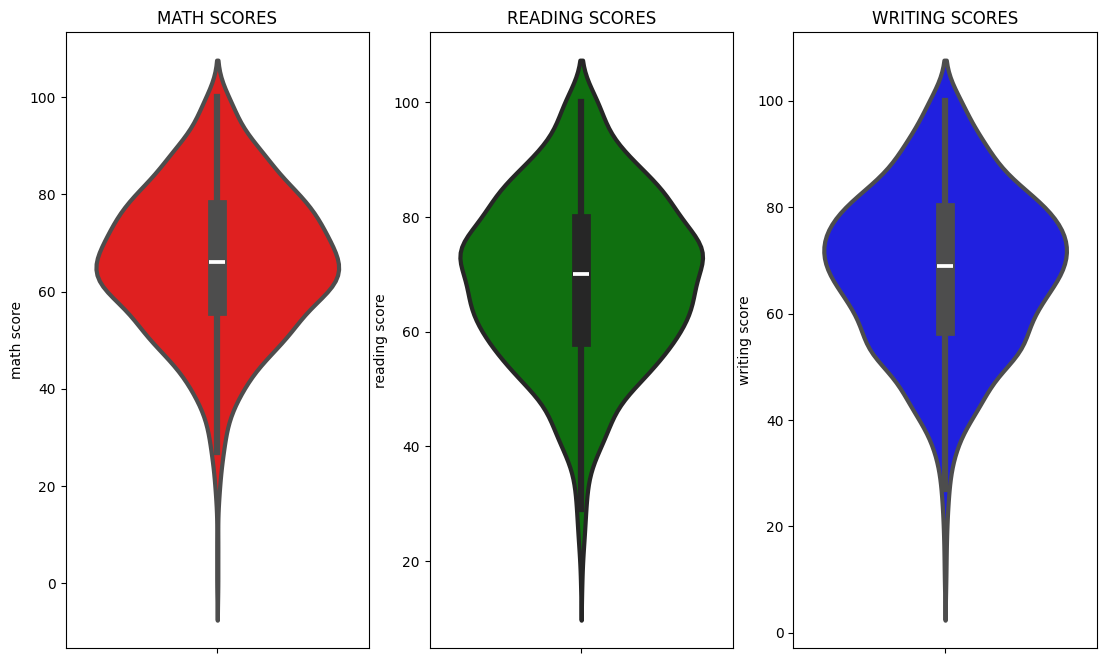

In [24]:
# Maximum Score of students in all 3 subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

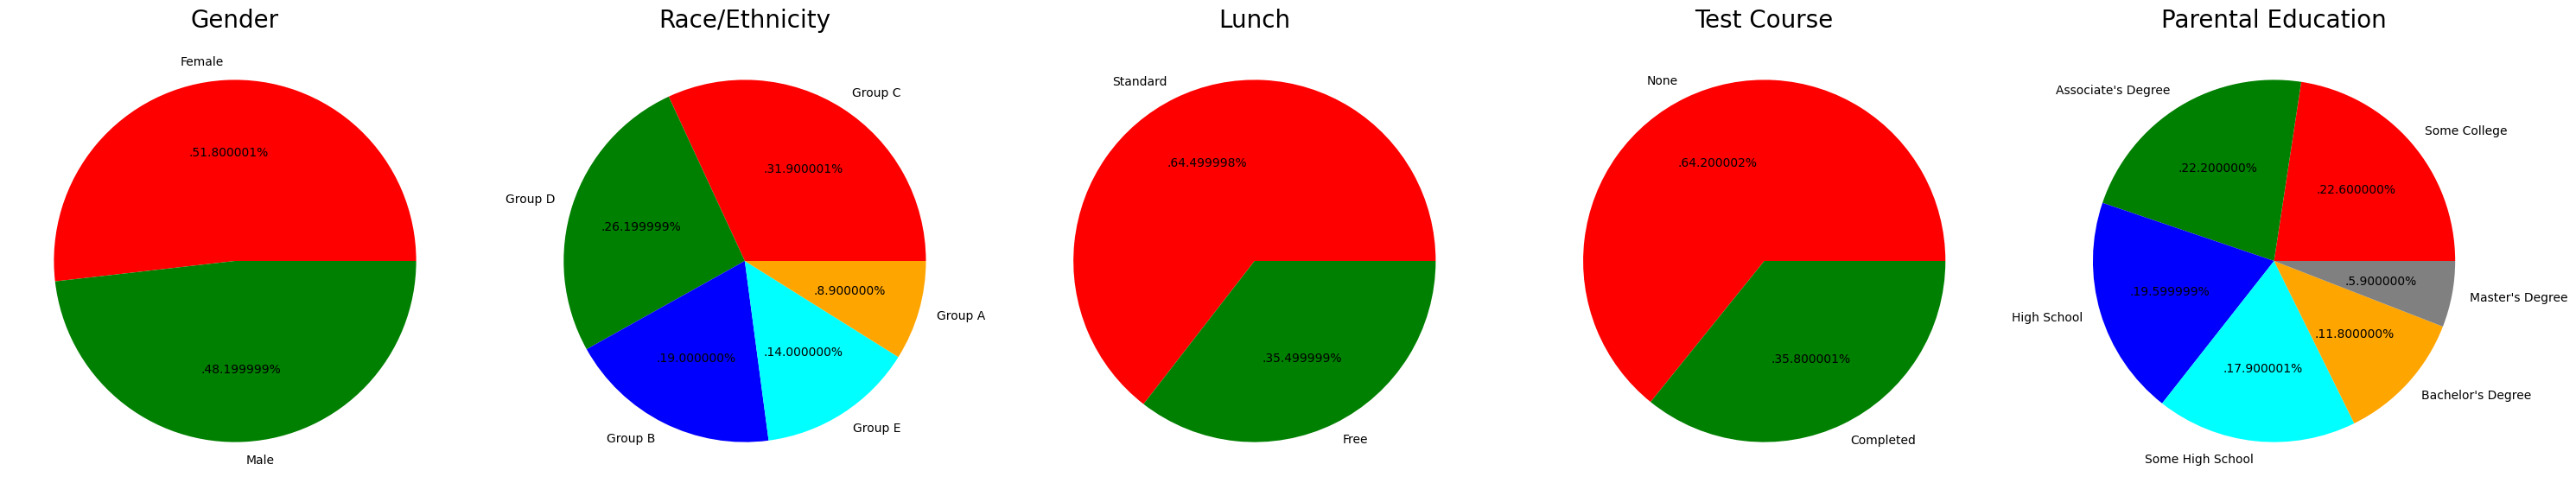

In [25]:
# Multivariate Analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Check for outliers

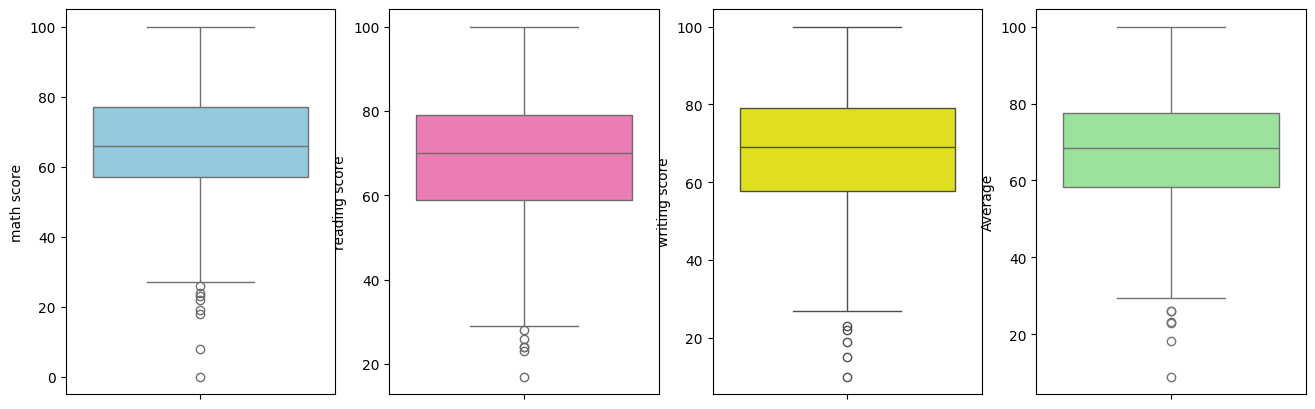

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

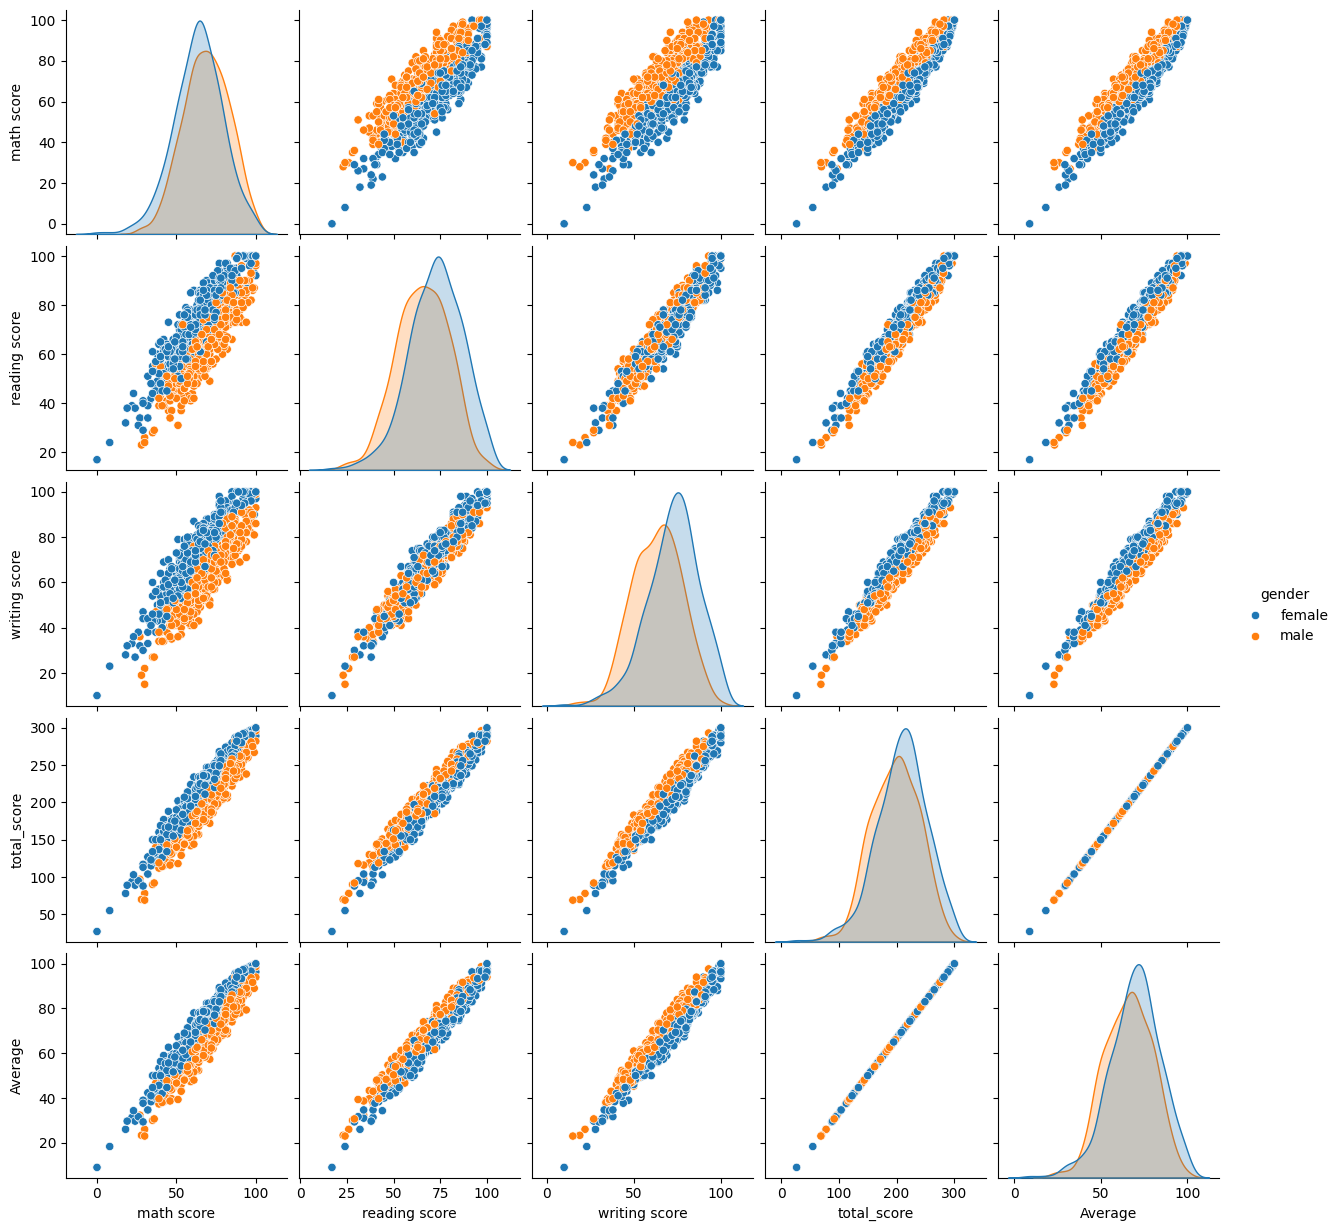

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()